In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [14]:
df_train_processed = pd.read_csv("../data/processed/train_processed.csv")
df_test_processed = pd.read_csv("../data/processed/test_processed.csv")
df_train_processed.columns

Index(['account_status', 'savings', 'employment_yr', 'job',
       'credit_history_critical account', 'credit_history_delayed payments',
       'credit_history_existing credits paid',
       'credit_history_no credits / all paid back', 'purpose_business',
       'purpose_car (new)', 'purpose_car (used)', 'purpose_education',
       'purpose_furniture', 'purpose_other', 'purpose_radio/TV',
       'purpose_repairs', 'purpose_retraining',
       'personal_status_sex_male-div/sep', 'personal_status_sex_male-married',
       'personal_status_sex_male-single', 'other_debtors_guarantor',
       'other_debtors_none', 'property_life insurance', 'property_real estate',
       'property_unknown', 'other_installment_plans_none',
       'other_installment_plans_stores', 'telephone_yes', 'foreign_worker_yes',
       'housing_own', 'housing_rent', 'installment_rate_2',
       'installment_rate_3', 'installment_rate_4', 'residence_since_2',
       'residence_since_3', 'residence_since_4', 'existing_cr

It is noticable that the features are too many and messy here. In order to save computation cost, I will rule out the features less correlated to the target. 

Firstly I will drop the telephone column since it's less correlated with the credit classification. After initial EDA, I drop `other_installment_plans` columns since most of the values are "none". At the same time, I will drop `foreign_worker` since most of the values are "yes". I also drop `other_debtors` here because of the same logic (most of values are "none"). 

In [15]:
drop_cols = [
        "telephone_yes", 
        "other_installment_plans_none", 
        "other_installment_plans_stores", 
        "foreign_worker_yes", 
        "other_debtors_guarantor",
        "other_debtors_none"
        ]
df_train_processed = df_train_processed.drop(columns=drop_cols)
df_test_processed = df_test_processed.drop(columns=drop_cols)
df_train_processed.columns

Index(['account_status', 'savings', 'employment_yr', 'job',
       'credit_history_critical account', 'credit_history_delayed payments',
       'credit_history_existing credits paid',
       'credit_history_no credits / all paid back', 'purpose_business',
       'purpose_car (new)', 'purpose_car (used)', 'purpose_education',
       'purpose_furniture', 'purpose_other', 'purpose_radio/TV',
       'purpose_repairs', 'purpose_retraining',
       'personal_status_sex_male-div/sep', 'personal_status_sex_male-married',
       'personal_status_sex_male-single', 'property_life insurance',
       'property_real estate', 'property_unknown', 'housing_own',
       'housing_rent', 'installment_rate_2', 'installment_rate_3',
       'installment_rate_4', 'residence_since_2', 'residence_since_3',
       'residence_since_4', 'existing_credits_2', 'existing_credits_3',
       'existing_credits_4', 'num_liable_people_2', 'duration_mon',
       'credit_amount', 'age', 'target'],
      dtype='object')

In order to select features that are related with target, I use random forest model to generate feature seleciton

In [40]:
X_train = df_train_processed.drop(columns='target')
y_train = df_train_processed['target']

X_test = df_test_processed.drop(columns='target')
y_test = df_test_processed['target']

selector = SelectFromModel(RandomForestClassifier(random_state=123), threshold='median')
selector.fit(X_train, y_train)
X_train_sel = selector.transform(X_train)
X_test_sel = selector.transform(X_test)

In [41]:
selected_cols = X_train.columns[selector.get_support()]
X_train_sel_df = pd.DataFrame(X_train_sel, columns=selected_cols)
X_train_sel_df

,account_status,savings,employment_yr,job,credit_history_critical account,credit_history_existing credits paid,purpose_car (new),personal_status_sex_male-single,property_life insurance,property_real estate,housing_own,installment_rate_2,installment_rate_4,residence_since_2,residence_since_4,existing_credits_2,duration_mon,credit_amount,age
0,0.0,3.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.248625,-0.682061,-0.666315
1,1.0,0.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.001339,-0.586046,0.395365
2,2.0,1.0,2.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.248625,2.926130,-1.108682
3,1.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.987804,-0.685604,-1.197156
4,0.0,1.0,2.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.237768,0.490672,-0.312422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,1.0,0.0,3.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-0.081089,-0.385866,0.306892
796,2.0,1.0,4.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.740518,0.111925,-0.666315
797,0.0,1.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,-0.740518,-0.669306,-0.577842
798,0.0,1.0,3.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,-1.399946,-0.637065,0.572312


Next, in order to filter high correlated features, I calculate correltion matrix here and drop the features that are highly correlated. 

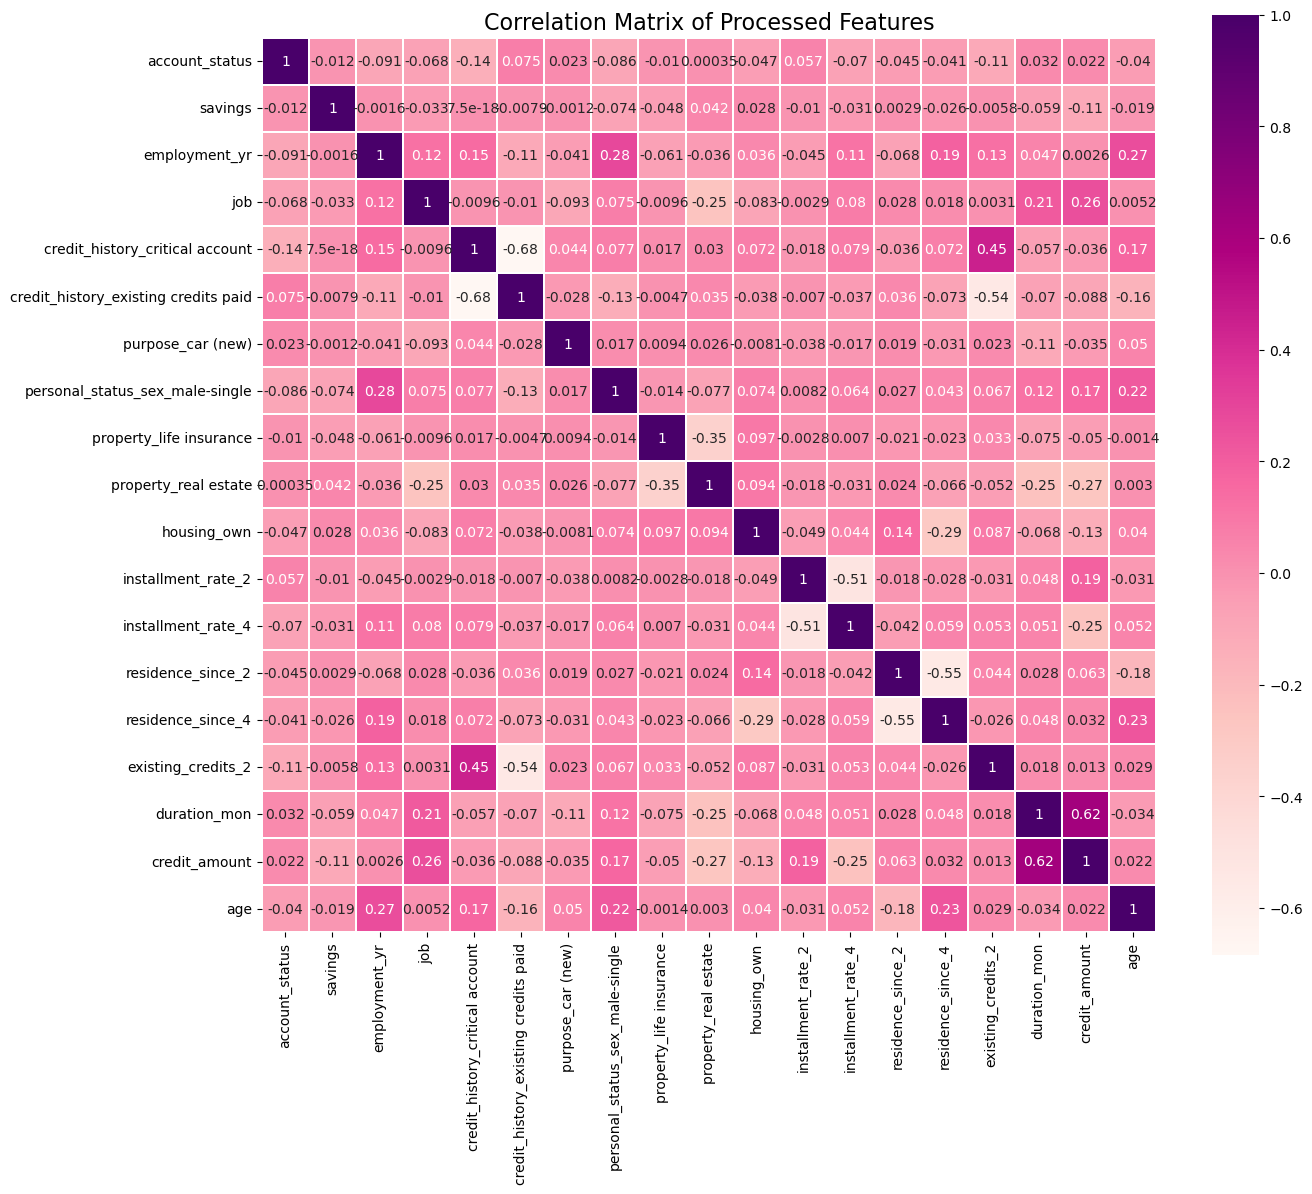

In [43]:
corr_matrix = X_train_sel_df.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(
    corr_matrix,
    linewidths=0.1,
    vmax=1.0,
    square=True,
    linecolor='white',
    annot=True,
    cmap='RdPu'  # 或者 'coolwarm' / 'YlGnBu' 等
)
plt.title("Correlation Matrix of Processed Features", fontsize=16)
plt.tight_layout()
plt.show()

All features remained don't have correlation higher than 0.6, which means no significant multicolinear. 